In [1]:
#import our Neural Net with 3 layers. Change path depending on where the script is located
exec(open("../Utilities/NNx3.py").read())
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [52]:
df = pd.read_csv('winequality_red_Train.csv')
dfTest = pd.read_csv('winequality_red_Test.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


In [53]:
#check the data is clean of null values. if we see 0 then we are good
df.isnull().values.sum()

0

In [54]:
df['bad'] = 0
df['average'] = 0
df['good'] = 0
#for each row, if quality is between range, then bad, average good = this thing
for idx, row in enumerate(df['quality']):
    if(row < 5):
        df.loc[idx,'bad'] = 1
    elif(row >6):
        df.loc[idx,'good'] = 1
    else:
        df.loc[idx,'average'] = 1

dfTest['bad'] = 0
dfTest['average'] = 0
dfTest['good'] = 0
#for each row, if quality is between range, then bad, average good = this thing
for idx, row in enumerate(dfTest['quality']):
    if(row < 5):
        dfTest.loc[idx,'bad'] = 1
    elif(row >6):
        dfTest.loc[idx,'good'] = 1
    else:
        dfTest.loc[idx,'average'] = 1

In [55]:
df = normalise(df)
dfTest = normalise(dfTest)

In [56]:
# Train Get labels
y = df[['bad','average','good']].values
# Get inputs; we define our x and y here.
X = df.drop(['quality', 'bad','average','good'], axis = 1)
X.shape, y.shape # Print shapes just to check
X = X.values

# Get test labels
yTest = dfTest[['bad','average','good']].values
# Get inputs; we define our x and y here.
XTest = dfTest.drop(['quality', 'bad','average','good'], axis = 1)
XTest.shape, yTest.shape # Print shapes just to check
XTest = XTest.values

inputDimensions = 11
hiddenDimensions = 20
outputDimensions = 3
learningRate = .5
trainingCycles = 300000

In [57]:
#need to make random start from a base of 0
np.random.seed(0)
#epochs is one full training forward and back propagation
#LEarning rate is hoow rapidly the parameters change
# This is what we return at the end
model = initialise_parameters(nn_input_dim=inputDimensions, nn_hdim= hiddenDimensions, nn_output_dim= outputDimensions)

Loss after iteration 0 : 2.045099124455577
Accuracy after iteration 0 : 82.32154769846565 %
Loss after iteration 100 : 0.6458372264720887
Accuracy after iteration 100 : 82.32154769846565 %
Loss after iteration 200 : 0.6328519564721837
Accuracy after iteration 200 : 82.32154769846565 %
Loss after iteration 300 : 0.6226489423788197
Accuracy after iteration 300 : 82.32154769846565 %
Loss after iteration 400 : 0.6113400782324544
Accuracy after iteration 400 : 82.32154769846565 %
Loss after iteration 500 : 0.5993276380729143
Accuracy after iteration 500 : 82.32154769846565 %
Loss after iteration 600 : 0.5794751764280931
Accuracy after iteration 600 : 72.84856571047365 %
Loss after iteration 700 : 0.5595485011675687
Accuracy after iteration 700 : 73.04869913275517 %
Loss after iteration 800 : 0.5469844846683077
Accuracy after iteration 800 : 73.71581054036024 %
Loss after iteration 900 : 0.5370284920315669
Accuracy after iteration 900 : 74.2494996664443 %
Loss after iteration 1000 : 0.519693

Loss after iteration 8300 : 0.38494492190208324
Accuracy after iteration 8300 : 82.12141427618413 %
Loss after iteration 8400 : 0.3836730346450999
Accuracy after iteration 8400 : 82.12141427618413 %
Loss after iteration 8500 : 0.3824141691046289
Accuracy after iteration 8500 : 81.9879919946631 %
Loss after iteration 8600 : 0.38119603786088335
Accuracy after iteration 8600 : 82.05470313542361 %
Loss after iteration 8700 : 0.38007013827326314
Accuracy after iteration 8700 : 82.12141427618413 %
Loss after iteration 8800 : 0.3790755465745915
Accuracy after iteration 8800 : 82.25483655770513 %
Loss after iteration 8900 : 0.3782002430135189
Accuracy after iteration 8900 : 82.38825883922615 %
Loss after iteration 9000 : 0.3774026116823663
Accuracy after iteration 9000 : 82.45496997998666 %
Loss after iteration 9100 : 0.37667586109500795
Accuracy after iteration 9100 : 82.58839226150766 %
Loss after iteration 9200 : 0.3759840761291236
Accuracy after iteration 9200 : 82.58839226150766 %
Loss af

Loss after iteration 16500 : 0.34371546541877296
Accuracy after iteration 16500 : 83.9226150767178 %
Loss after iteration 16600 : 0.3434307432465694
Accuracy after iteration 16600 : 83.9226150767178 %
Loss after iteration 16700 : 0.34315279710348057
Accuracy after iteration 16700 : 83.9226150767178 %
Loss after iteration 16800 : 0.34287970562309417
Accuracy after iteration 16800 : 83.9226150767178 %
Loss after iteration 16900 : 0.3426098921828571
Accuracy after iteration 16900 : 83.9226150767178 %
Loss after iteration 17000 : 0.3423423007384417
Accuracy after iteration 17000 : 83.9226150767178 %
Loss after iteration 17100 : 0.3420765298178481
Accuracy after iteration 17100 : 83.9226150767178 %
Loss after iteration 17200 : 0.34181281175362777
Accuracy after iteration 17200 : 83.9226150767178 %
Loss after iteration 17300 : 0.3415518230393949
Accuracy after iteration 17300 : 83.85590393595731 %
Loss after iteration 17400 : 0.3412944176861764
Accuracy after iteration 17400 : 83.85590393595

Loss after iteration 24600 : 0.3369864517248647
Accuracy after iteration 24600 : 84.32288192128085 %
Loss after iteration 24700 : 0.3222681502649312
Accuracy after iteration 24700 : 85.12341561040694 %
Loss after iteration 24800 : 0.3218673714113006
Accuracy after iteration 24800 : 85.05670446964643 %
Loss after iteration 24900 : 0.33878834178370243
Accuracy after iteration 24900 : 84.18945963975985 %
Loss after iteration 25000 : 0.32174515031382545
Accuracy after iteration 25000 : 85.25683789192794 %
Loss after iteration 25100 : 0.32123854036505367
Accuracy after iteration 25100 : 85.05670446964643 %
Loss after iteration 25200 : 0.3209628580953795
Accuracy after iteration 25200 : 84.98999332888593 %
Loss after iteration 25300 : 0.32873709421094116
Accuracy after iteration 25300 : 85.19012675116745 %
Loss after iteration 25400 : 0.32061355297697114
Accuracy after iteration 25400 : 85.19012675116745 %
Loss after iteration 25500 : 0.3202395341325767
Accuracy after iteration 25500 : 85.19

Loss after iteration 32700 : 0.3045938440023961
Accuracy after iteration 32700 : 87.19146097398266 %
Loss after iteration 32800 : 0.3027181184532971
Accuracy after iteration 32800 : 86.79119412941961 %
Loss after iteration 32900 : 0.3029845956262375
Accuracy after iteration 32900 : 87.12474983322215 %
Loss after iteration 33000 : 0.3022178122969698
Accuracy after iteration 33000 : 86.79119412941961 %
Loss after iteration 33100 : 0.32745977551902533
Accuracy after iteration 33100 : 85.25683789192794 %
Loss after iteration 33200 : 0.3016494038777737
Accuracy after iteration 33200 : 86.79119412941961 %
Loss after iteration 33300 : 0.3179496318065772
Accuracy after iteration 33300 : 86.39092728485657 %
Loss after iteration 33400 : 0.3011750421937913
Accuracy after iteration 33400 : 86.79119412941961 %
Loss after iteration 33500 : 0.3046778725144355
Accuracy after iteration 33500 : 87.52501667778519 %
Loss after iteration 33600 : 0.3016385693277636
Accuracy after iteration 33600 : 87.324883

Loss after iteration 40800 : 0.2904538030852128
Accuracy after iteration 40800 : 88.12541694462975 %
Loss after iteration 40900 : 0.2943400932644692
Accuracy after iteration 40900 : 88.39226150767178 %
Loss after iteration 41000 : 0.30902423674161056
Accuracy after iteration 41000 : 86.92461641094063 %
Loss after iteration 41100 : 0.3283606439828776
Accuracy after iteration 41100 : 86.12408272181455 %
Loss after iteration 41200 : 0.2980395173444731
Accuracy after iteration 41200 : 87.39159439626417 %
Loss after iteration 41300 : 0.29223236216721993
Accuracy after iteration 41300 : 88.25883922615077 %
Loss after iteration 41400 : 0.28986060015755155
Accuracy after iteration 41400 : 88.32555036691127 %
Loss after iteration 41500 : 0.2887842790346939
Accuracy after iteration 41500 : 88.25883922615077 %
Loss after iteration 41600 : 0.2882906576943489
Accuracy after iteration 41600 : 87.99199466310874 %
Loss after iteration 41700 : 0.28800936560802953
Accuracy after iteration 41700 : 87.791

Loss after iteration 48900 : 0.2793432680853649
Accuracy after iteration 48900 : 88.92595063375583 %
Loss after iteration 49000 : 0.27899251070614656
Accuracy after iteration 49000 : 88.79252835223483 %
Loss after iteration 49100 : 0.279915140172614
Accuracy after iteration 49100 : 89.19279519679787 %
Loss after iteration 49200 : 0.29257821876675444
Accuracy after iteration 49200 : 88.25883922615077 %
Loss after iteration 49300 : 0.278917203052231
Accuracy after iteration 49300 : 88.99266177451635 %
Loss after iteration 49400 : 0.28047460628638143
Accuracy after iteration 49400 : 89.05937291527685 %
Loss after iteration 49500 : 0.2806736242445963
Accuracy after iteration 49500 : 89.19279519679787 %
Loss after iteration 49600 : 0.2796032215510403
Accuracy after iteration 49600 : 89.12608405603736 %
Loss after iteration 49700 : 0.2869650653928212
Accuracy after iteration 49700 : 88.72581721147431 %
Loss after iteration 49800 : 0.2799344197898834
Accuracy after iteration 49800 : 89.192795

Loss after iteration 57000 : 0.2940413764602058
Accuracy after iteration 57000 : 88.39226150767178 %
Loss after iteration 57100 : 0.265511489624878
Accuracy after iteration 57100 : 89.5263509006004 %
Loss after iteration 57200 : 0.26257791878032
Accuracy after iteration 57200 : 89.59306204136091 %
Loss after iteration 57300 : 0.2661930464873552
Accuracy after iteration 57300 : 89.39292861907938 %
Loss after iteration 57400 : 0.2850091549544891
Accuracy after iteration 57400 : 88.39226150767178 %
Loss after iteration 57500 : 0.2904828820878353
Accuracy after iteration 57500 : 88.4589726484323 %
Loss after iteration 57600 : 0.2717266223726393
Accuracy after iteration 57600 : 89.12608405603736 %
Loss after iteration 57700 : 0.2797897693875858
Accuracy after iteration 57700 : 88.65910607071382 %
Loss after iteration 57800 : 0.26812188279624244
Accuracy after iteration 57800 : 89.12608405603736 %
Loss after iteration 57900 : 0.32995726387544216
Accuracy after iteration 57900 : 88.5256837891

Loss after iteration 65100 : 0.26798887194775706
Accuracy after iteration 65100 : 88.4589726484323 %
Loss after iteration 65200 : 0.25367170857499716
Accuracy after iteration 65200 : 90.32688458972649 %
Loss after iteration 65300 : 0.25342700136583624
Accuracy after iteration 65300 : 90.32688458972649 %
Loss after iteration 65400 : 0.2532672465254575
Accuracy after iteration 65400 : 90.32688458972649 %
Loss after iteration 65500 : 0.2650679757263672
Accuracy after iteration 65500 : 88.32555036691127 %
Loss after iteration 65600 : 0.2603594179859283
Accuracy after iteration 65600 : 89.45963975983989 %
Loss after iteration 65700 : 0.2531932236806117
Accuracy after iteration 65700 : 90.32688458972649 %
Loss after iteration 65800 : 0.25300466718383813
Accuracy after iteration 65800 : 90.32688458972649 %
Loss after iteration 65900 : 0.25286826549815083
Accuracy after iteration 65900 : 90.32688458972649 %
Loss after iteration 66000 : 0.25300460395297836
Accuracy after iteration 66000 : 90.26

Loss after iteration 73200 : 0.24613189951130982
Accuracy after iteration 73200 : 90.5937291527685 %
Loss after iteration 73300 : 0.24601132282533403
Accuracy after iteration 73300 : 90.5937291527685 %
Loss after iteration 73400 : 0.2714773075033516
Accuracy after iteration 73400 : 89.5263509006004 %
Loss after iteration 73500 : 0.24589620703548334
Accuracy after iteration 73500 : 90.66044029352902 %
Loss after iteration 73600 : 0.24578281510134548
Accuracy after iteration 73600 : 90.66044029352902 %
Loss after iteration 73700 : 0.255351284852437
Accuracy after iteration 73700 : 90.4603068712475 %
Loss after iteration 73800 : 0.24564463034862274
Accuracy after iteration 73800 : 90.66044029352902 %
Loss after iteration 73900 : 0.24559495728757266
Accuracy after iteration 73900 : 90.66044029352902 %
Loss after iteration 74000 : 0.24748972876495212
Accuracy after iteration 74000 : 90.5937291527685 %
Loss after iteration 74100 : 0.24537850473965273
Accuracy after iteration 74100 : 90.66044

Loss after iteration 81300 : 0.346693820248139
Accuracy after iteration 81300 : 84.05603735823883 %
Loss after iteration 81400 : 0.23854035247715613
Accuracy after iteration 81400 : 90.79386257505003 %
Loss after iteration 81500 : 0.23842889088522595
Accuracy after iteration 81500 : 90.72715143428952 %
Loss after iteration 81600 : 0.2383572978543835
Accuracy after iteration 81600 : 90.72715143428952 %
Loss after iteration 81700 : 0.23829509477295893
Accuracy after iteration 81700 : 90.72715143428952 %
Loss after iteration 81800 : 0.23823678876725882
Accuracy after iteration 81800 : 90.72715143428952 %
Loss after iteration 81900 : 0.2381805470536046
Accuracy after iteration 81900 : 90.72715143428952 %
Loss after iteration 82000 : 0.23812560226509075
Accuracy after iteration 82000 : 90.72715143428952 %
Loss after iteration 82100 : 0.23807353043365279
Accuracy after iteration 82100 : 90.72715143428952 %
Loss after iteration 82200 : 0.23868652672128624
Accuracy after iteration 82200 : 90.4

Loss after iteration 89400 : 0.23497203459301852
Accuracy after iteration 89400 : 90.86057371581055 %
Loss after iteration 89500 : 0.2349373605833558
Accuracy after iteration 89500 : 90.86057371581055 %
Loss after iteration 89600 : 0.23490280374579456
Accuracy after iteration 89600 : 90.86057371581055 %
Loss after iteration 89700 : 0.23486836498418048
Accuracy after iteration 89700 : 90.86057371581055 %
Loss after iteration 89800 : 0.23483404628051488
Accuracy after iteration 89800 : 90.86057371581055 %
Loss after iteration 89900 : 0.23479985058117112
Accuracy after iteration 89900 : 90.86057371581055 %
Loss after iteration 90000 : 0.2347657816405184
Accuracy after iteration 90000 : 90.86057371581055 %
Loss after iteration 90100 : 0.23473184382960938
Accuracy after iteration 90100 : 90.86057371581055 %
Loss after iteration 90200 : 0.23469804192139568
Accuracy after iteration 90200 : 90.86057371581055 %
Loss after iteration 90300 : 0.23466438086630914
Accuracy after iteration 90300 : 90

Loss after iteration 97500 : 0.2305586444794982
Accuracy after iteration 97500 : 91.12741827885257 %
Loss after iteration 97600 : 0.23048925194766193
Accuracy after iteration 97600 : 91.12741827885257 %
Loss after iteration 97700 : 0.23041984815121683
Accuracy after iteration 97700 : 91.12741827885257 %
Loss after iteration 97800 : 0.2303510635352228
Accuracy after iteration 97800 : 91.12741827885257 %
Loss after iteration 97900 : 0.37368838586910164
Accuracy after iteration 97900 : 83.52234823215477 %
Loss after iteration 98000 : 0.23093878926550937
Accuracy after iteration 98000 : 91.12741827885257 %
Loss after iteration 98100 : 0.23051227041861047
Accuracy after iteration 98100 : 91.12741827885257 %
Loss after iteration 98200 : 0.23032299174974596
Accuracy after iteration 98200 : 91.12741827885257 %
Loss after iteration 98300 : 0.2302038314153291
Accuracy after iteration 98300 : 91.12741827885257 %
Loss after iteration 98400 : 0.23011256836123245
Accuracy after iteration 98400 : 91.

Loss after iteration 105500 : 0.22717173198975538
Accuracy after iteration 105500 : 91.3275517011341 %
Loss after iteration 105600 : 0.22701101052193945
Accuracy after iteration 105600 : 91.3275517011341 %
Loss after iteration 105700 : 0.22693175381150157
Accuracy after iteration 105700 : 91.3275517011341 %
Loss after iteration 105800 : 0.2268731266545514
Accuracy after iteration 105800 : 91.3275517011341 %
Loss after iteration 105900 : 0.2268227710557265
Accuracy after iteration 105900 : 91.3275517011341 %
Loss after iteration 106000 : 0.22681464017814607
Accuracy after iteration 106000 : 91.26084056037358 %
Loss after iteration 106100 : 0.31432516205743216
Accuracy after iteration 106100 : 88.12541694462975 %
Loss after iteration 106200 : 0.2983113226055298
Accuracy after iteration 106200 : 88.72581721147431 %
Loss after iteration 106300 : 0.29025842327967427
Accuracy after iteration 106300 : 89.12608405603736 %
Loss after iteration 106400 : 0.28585987475033225
Accuracy after iterati

Loss after iteration 113500 : 0.22254790859886636
Accuracy after iteration 113500 : 91.66110740493663 %
Loss after iteration 113600 : 0.22239045024796159
Accuracy after iteration 113600 : 91.66110740493663 %
Loss after iteration 113700 : 0.22224580508322586
Accuracy after iteration 113700 : 91.66110740493663 %
Loss after iteration 113800 : 0.22211217276398224
Accuracy after iteration 113800 : 91.66110740493663 %
Loss after iteration 113900 : 0.2219880178463322
Accuracy after iteration 113900 : 91.66110740493663 %
Loss after iteration 114000 : 0.22187201946318386
Accuracy after iteration 114000 : 91.66110740493663 %
Loss after iteration 114100 : 0.2217630440533927
Accuracy after iteration 114100 : 91.66110740493663 %
Loss after iteration 114200 : 0.22166012464653037
Accuracy after iteration 114200 : 91.66110740493663 %
Loss after iteration 114300 : 0.2215624393173851
Accuracy after iteration 114300 : 91.66110740493663 %
Loss after iteration 114400 : 0.2214692265548303
Accuracy after ite

Loss after iteration 121500 : 0.2177691119655426
Accuracy after iteration 121500 : 91.92795196797864 %
Loss after iteration 121600 : 0.21625688238450658
Accuracy after iteration 121600 : 92.26150767178119 %
Loss after iteration 121700 : 0.290037925025249
Accuracy after iteration 121700 : 89.5263509006004 %
Loss after iteration 121800 : 0.21585746635094566
Accuracy after iteration 121800 : 92.46164109406271 %
Loss after iteration 121900 : 0.21567729027035562
Accuracy after iteration 121900 : 92.46164109406271 %
Loss after iteration 122000 : 0.2161301360405931
Accuracy after iteration 122000 : 92.32821881254169 %
Loss after iteration 122100 : 0.21649234340777573
Accuracy after iteration 122100 : 92.32821881254169 %
Loss after iteration 122200 : 0.21637009183836167
Accuracy after iteration 122200 : 92.32821881254169 %
Loss after iteration 122300 : 0.2162730139143299
Accuracy after iteration 122300 : 92.32821881254169 %
Loss after iteration 122400 : 0.21621883976501732
Accuracy after itera

Loss after iteration 129500 : 0.21110834971400103
Accuracy after iteration 129500 : 92.59506337558372 %
Loss after iteration 129600 : 0.21097943196302407
Accuracy after iteration 129600 : 92.66177451634422 %
Loss after iteration 129700 : 0.2118312926150211
Accuracy after iteration 129700 : 92.72848565710473 %
Loss after iteration 129800 : 0.21121736151260773
Accuracy after iteration 129800 : 92.72848565710473 %
Loss after iteration 129900 : 0.21066182858082816
Accuracy after iteration 129900 : 92.72848565710473 %
Loss after iteration 130000 : 0.21047298186822586
Accuracy after iteration 130000 : 92.72848565710473 %
Loss after iteration 130100 : 0.21100714344996194
Accuracy after iteration 130100 : 92.79519679786524 %
Loss after iteration 130200 : 0.21177235276829423
Accuracy after iteration 130200 : 92.66177451634422 %
Loss after iteration 130300 : 0.2113142823577277
Accuracy after iteration 130300 : 92.66177451634422 %
Loss after iteration 130400 : 0.21494771951082964
Accuracy after i

Loss after iteration 137500 : 0.2082401022266623
Accuracy after iteration 137500 : 92.86190793862575 %
Loss after iteration 137600 : 0.20992954034660438
Accuracy after iteration 137600 : 92.66177451634422 %
Loss after iteration 137700 : 0.20835133017010637
Accuracy after iteration 137700 : 92.86190793862575 %
Loss after iteration 137800 : 0.20827475095245987
Accuracy after iteration 137800 : 92.86190793862575 %
Loss after iteration 137900 : 0.20852504459735863
Accuracy after iteration 137900 : 92.86190793862575 %
Loss after iteration 138000 : 0.22600079825238437
Accuracy after iteration 138000 : 89.92661774516344 %
Loss after iteration 138100 : 0.21020630256864664
Accuracy after iteration 138100 : 92.72848565710473 %
Loss after iteration 138200 : 0.20833147900233936
Accuracy after iteration 138200 : 92.86190793862575 %
Loss after iteration 138300 : 0.2084148881213317
Accuracy after iteration 138300 : 92.86190793862575 %
Loss after iteration 138400 : 0.20936743860430213
Accuracy after i

Loss after iteration 145500 : 0.20604710227304435
Accuracy after iteration 145500 : 92.79519679786524 %
Loss after iteration 145600 : 0.2064228584454501
Accuracy after iteration 145600 : 92.79519679786524 %
Loss after iteration 145700 : 0.20606027172412159
Accuracy after iteration 145700 : 92.79519679786524 %
Loss after iteration 145800 : 0.20589068486087056
Accuracy after iteration 145800 : 92.79519679786524 %
Loss after iteration 145900 : 0.20606654102511351
Accuracy after iteration 145900 : 92.79519679786524 %
Loss after iteration 146000 : 0.2069407319350183
Accuracy after iteration 146000 : 92.79519679786524 %
Loss after iteration 146100 : 0.20576351658126846
Accuracy after iteration 146100 : 92.79519679786524 %
Loss after iteration 146200 : 0.2061503284218715
Accuracy after iteration 146200 : 92.79519679786524 %
Loss after iteration 146300 : 0.2057618236366863
Accuracy after iteration 146300 : 92.86190793862575 %
Loss after iteration 146400 : 0.20651810020251482
Accuracy after ite

Loss after iteration 153500 : 0.20454085669770566
Accuracy after iteration 153500 : 92.86190793862575 %
Loss after iteration 153600 : 0.2045142949058735
Accuracy after iteration 153600 : 92.86190793862575 %
Loss after iteration 153700 : 0.20449052667809722
Accuracy after iteration 153700 : 92.86190793862575 %
Loss after iteration 153800 : 0.20446867470824598
Accuracy after iteration 153800 : 92.86190793862575 %
Loss after iteration 153900 : 0.20444824650672105
Accuracy after iteration 153900 : 92.86190793862575 %
Loss after iteration 154000 : 0.20442893350671212
Accuracy after iteration 154000 : 92.86190793862575 %
Loss after iteration 154100 : 0.20441052603565485
Accuracy after iteration 154100 : 92.86190793862575 %
Loss after iteration 154200 : 0.2043932308412983
Accuracy after iteration 154200 : 92.86190793862575 %
Loss after iteration 154300 : 0.2154223329565518
Accuracy after iteration 154300 : 92.79519679786524 %
Loss after iteration 154400 : 0.20460213699602867
Accuracy after it

Loss after iteration 161500 : 0.2036595522926658
Accuracy after iteration 161500 : 92.86190793862575 %
Loss after iteration 161600 : 0.20364451299655623
Accuracy after iteration 161600 : 92.86190793862575 %
Loss after iteration 161700 : 0.20362911063938804
Accuracy after iteration 161700 : 92.86190793862575 %
Loss after iteration 161800 : 0.20361322419006914
Accuracy after iteration 161800 : 92.86190793862575 %
Loss after iteration 161900 : 0.2035967379368334
Accuracy after iteration 161900 : 92.86190793862575 %
Loss after iteration 162000 : 0.2035795580384722
Accuracy after iteration 162000 : 92.86190793862575 %
Loss after iteration 162100 : 0.20356163686191237
Accuracy after iteration 162100 : 92.86190793862575 %
Loss after iteration 162200 : 0.2035430000864384
Accuracy after iteration 162200 : 92.86190793862575 %
Loss after iteration 162300 : 0.2035237643183547
Accuracy after iteration 162300 : 92.86190793862575 %
Loss after iteration 162400 : 0.20350412963297893
Accuracy after iter

Loss after iteration 169500 : 0.23955706688394618
Accuracy after iteration 169500 : 91.79452968645764 %
Loss after iteration 169600 : 0.2397350280658179
Accuracy after iteration 169600 : 91.79452968645764 %
Loss after iteration 169700 : 0.23954478535045134
Accuracy after iteration 169700 : 91.92795196797864 %
Loss after iteration 169800 : 0.23926372394156634
Accuracy after iteration 169800 : 91.92795196797864 %
Loss after iteration 169900 : 0.2389340764241026
Accuracy after iteration 169900 : 91.92795196797864 %
Loss after iteration 170000 : 0.23860575006241827
Accuracy after iteration 170000 : 91.92795196797864 %
Loss after iteration 170100 : 0.23827512638364576
Accuracy after iteration 170100 : 91.92795196797864 %
Loss after iteration 170200 : 0.23787149151367162
Accuracy after iteration 170200 : 91.99466310873916 %
Loss after iteration 170300 : 0.2363709699256823
Accuracy after iteration 170300 : 92.12808539026017 %
Loss after iteration 170400 : 0.23695849187746187
Accuracy after it

Loss after iteration 177500 : 0.22885443854009446
Accuracy after iteration 177500 : 92.3949299533022 %
Loss after iteration 177600 : 0.2288004104853277
Accuracy after iteration 177600 : 92.3949299533022 %
Loss after iteration 177700 : 0.22874760083202247
Accuracy after iteration 177700 : 92.3949299533022 %
Loss after iteration 177800 : 0.2286960334601419
Accuracy after iteration 177800 : 92.3949299533022 %
Loss after iteration 177900 : 0.2286457218340773
Accuracy after iteration 177900 : 92.3949299533022 %
Loss after iteration 178000 : 0.2285966702241253
Accuracy after iteration 178000 : 92.3949299533022 %
Loss after iteration 178100 : 0.22854887474810837
Accuracy after iteration 178100 : 92.3949299533022 %
Loss after iteration 178200 : 0.22850232434448686
Accuracy after iteration 178200 : 92.3949299533022 %
Loss after iteration 178300 : 0.2284570017315435
Accuracy after iteration 178300 : 92.3949299533022 %
Loss after iteration 178400 : 0.22841288436205998
Accuracy after iteration 178

Loss after iteration 185500 : 0.2266450490301267
Accuracy after iteration 185500 : 92.3949299533022 %
Loss after iteration 185600 : 0.22662283792206672
Accuracy after iteration 185600 : 92.3949299533022 %
Loss after iteration 185700 : 0.22660050513451527
Accuracy after iteration 185700 : 92.3949299533022 %
Loss after iteration 185800 : 0.22657813369004773
Accuracy after iteration 185800 : 92.3949299533022 %
Loss after iteration 185900 : 0.2265557917336162
Accuracy after iteration 185900 : 92.3949299533022 %
Loss after iteration 186000 : 0.2265335352584755
Accuracy after iteration 186000 : 92.3949299533022 %
Loss after iteration 186100 : 0.22651141084566961
Accuracy after iteration 186100 : 92.3949299533022 %
Loss after iteration 186200 : 0.22648945786498087
Accuracy after iteration 186200 : 92.3949299533022 %
Loss after iteration 186300 : 0.22646770995000554
Accuracy after iteration 186300 : 92.3949299533022 %
Loss after iteration 186400 : 0.22644619568324062
Accuracy after iteration 1

Loss after iteration 193500 : 0.22502791809195233
Accuracy after iteration 193500 : 92.3949299533022 %
Loss after iteration 193600 : 0.22501346243918563
Accuracy after iteration 193600 : 92.3949299533022 %
Loss after iteration 193700 : 0.2249991201278287
Accuracy after iteration 193700 : 92.3949299533022 %
Loss after iteration 193800 : 0.224984879555434
Accuracy after iteration 193800 : 92.3949299533022 %
Loss after iteration 193900 : 0.22497072951882308
Accuracy after iteration 193900 : 92.3949299533022 %
Loss after iteration 194000 : 0.22495665974329287
Accuracy after iteration 194000 : 92.3949299533022 %
Loss after iteration 194100 : 0.22494266142933295
Accuracy after iteration 194100 : 92.3949299533022 %
Loss after iteration 194200 : 0.22492872772679193
Accuracy after iteration 194200 : 92.3949299533022 %
Loss after iteration 194300 : 0.22491485404646944
Accuracy after iteration 194300 : 92.3949299533022 %
Loss after iteration 194400 : 0.22490103814543713
Accuracy after iteration 1

Loss after iteration 201500 : 0.22405766855598974
Accuracy after iteration 201500 : 92.3949299533022 %
Loss after iteration 201600 : 0.22404571739516807
Accuracy after iteration 201600 : 92.3949299533022 %
Loss after iteration 201700 : 0.22403354768786482
Accuracy after iteration 201700 : 92.3949299533022 %
Loss after iteration 201800 : 0.2240211220260825
Accuracy after iteration 201800 : 92.3949299533022 %
Loss after iteration 201900 : 0.2240083955449007
Accuracy after iteration 201900 : 92.3949299533022 %
Loss after iteration 202000 : 0.22399531408637566
Accuracy after iteration 202000 : 92.3949299533022 %
Loss after iteration 202100 : 0.22398181201095263
Accuracy after iteration 202100 : 92.3949299533022 %
Loss after iteration 202200 : 0.22396780982163766
Accuracy after iteration 202200 : 92.3949299533022 %
Loss after iteration 202300 : 0.22395321222596604
Accuracy after iteration 202300 : 92.3949299533022 %
Loss after iteration 202400 : 0.22393790850063178
Accuracy after iteration 

Loss after iteration 209500 : 0.2170047346965453
Accuracy after iteration 209500 : 92.52835223482322 %
Loss after iteration 209600 : 0.21688453887177517
Accuracy after iteration 209600 : 92.52835223482322 %
Loss after iteration 209700 : 0.21677222511037778
Accuracy after iteration 209700 : 92.52835223482322 %
Loss after iteration 209800 : 0.21666676606889873
Accuracy after iteration 209800 : 92.52835223482322 %
Loss after iteration 209900 : 0.21656710313684188
Accuracy after iteration 209900 : 92.52835223482322 %
Loss after iteration 210000 : 0.21647224459523245
Accuracy after iteration 210000 : 92.52835223482322 %
Loss after iteration 210100 : 0.21638130181559498
Accuracy after iteration 210100 : 92.52835223482322 %
Loss after iteration 210200 : 0.21629349287844055
Accuracy after iteration 210200 : 92.52835223482322 %
Loss after iteration 210300 : 0.21620813143026169
Accuracy after iteration 210300 : 92.52835223482322 %
Loss after iteration 210400 : 0.21612460640949732
Accuracy after 

Loss after iteration 217400 : 0.2129220773200855
Accuracy after iteration 217400 : 92.46164109406271 %
Loss after iteration 217500 : 0.21290065038648154
Accuracy after iteration 217500 : 92.52835223482322 %
Loss after iteration 217600 : 0.21287945364600097
Accuracy after iteration 217600 : 92.52835223482322 %
Loss after iteration 217700 : 0.21285847626876875
Accuracy after iteration 217700 : 92.52835223482322 %
Loss after iteration 217800 : 0.21283770722446652
Accuracy after iteration 217800 : 92.52835223482322 %
Loss after iteration 217900 : 0.21281713533906893
Accuracy after iteration 217900 : 92.52835223482322 %
Loss after iteration 218000 : 0.2127967493480273
Accuracy after iteration 218000 : 92.52835223482322 %
Loss after iteration 218100 : 0.21277653794637563
Accuracy after iteration 218100 : 92.52835223482322 %
Loss after iteration 218200 : 0.21275648983614978
Accuracy after iteration 218200 : 92.52835223482322 %
Loss after iteration 218300 : 0.2127365937714767
Accuracy after it

Loss after iteration 225400 : 0.21116220671232408
Accuracy after iteration 225400 : 92.52835223482322 %
Loss after iteration 225500 : 0.21113621176704603
Accuracy after iteration 225500 : 92.52835223482322 %
Loss after iteration 225600 : 0.21111053409385702
Accuracy after iteration 225600 : 92.52835223482322 %
Loss after iteration 225700 : 0.211085125998489
Accuracy after iteration 225700 : 92.52835223482322 %
Loss after iteration 225800 : 0.21105994345391826
Accuracy after iteration 225800 : 92.52835223482322 %
Loss after iteration 225900 : 0.2110349461554928
Accuracy after iteration 225900 : 92.52835223482322 %
Loss after iteration 226000 : 0.21101009724035924
Accuracy after iteration 226000 : 92.52835223482322 %
Loss after iteration 226100 : 0.21098536283818284
Accuracy after iteration 226100 : 92.52835223482322 %
Loss after iteration 226200 : 0.21096071155712426
Accuracy after iteration 226200 : 92.52835223482322 %
Loss after iteration 226300 : 0.21093611396578382
Accuracy after it

Loss after iteration 233400 : 0.20888396741998705
Accuracy after iteration 233400 : 92.52835223482322 %
Loss after iteration 233500 : 0.20885384366867865
Accuracy after iteration 233500 : 92.52835223482322 %
Loss after iteration 233600 : 0.20882274189389952
Accuracy after iteration 233600 : 92.52835223482322 %
Loss after iteration 233700 : 0.20879061645741015
Accuracy after iteration 233700 : 92.52835223482322 %
Loss after iteration 233800 : 0.20875746597642814
Accuracy after iteration 233800 : 92.52835223482322 %
Loss after iteration 233900 : 0.20872330598823746
Accuracy after iteration 233900 : 92.52835223482322 %
Loss after iteration 234000 : 0.2086881312863792
Accuracy after iteration 234000 : 92.52835223482322 %
Loss after iteration 234100 : 0.2086518870149945
Accuracy after iteration 234100 : 92.52835223482322 %
Loss after iteration 234200 : 0.20861445872879888
Accuracy after iteration 234200 : 92.52835223482322 %
Loss after iteration 234300 : 0.20857567939323282
Accuracy after i

Loss after iteration 241400 : 0.20401568722252666
Accuracy after iteration 241400 : 92.59506337558372 %
Loss after iteration 241500 : 0.2038858335600577
Accuracy after iteration 241500 : 92.59506337558372 %
Loss after iteration 241600 : 0.20377047550751404
Accuracy after iteration 241600 : 92.59506337558372 %
Loss after iteration 241700 : 0.20366360331514055
Accuracy after iteration 241700 : 92.59506337558372 %
Loss after iteration 241800 : 0.20356323538117255
Accuracy after iteration 241800 : 92.59506337558372 %
Loss after iteration 241900 : 0.20346853495050982
Accuracy after iteration 241900 : 92.59506337558372 %
Loss after iteration 242000 : 0.20337883858816902
Accuracy after iteration 242000 : 92.59506337558372 %
Loss after iteration 242100 : 0.20329346767385287
Accuracy after iteration 242100 : 92.59506337558372 %
Loss after iteration 242200 : 0.2032117518441855
Accuracy after iteration 242200 : 92.59506337558372 %
Loss after iteration 242300 : 0.20313308805548197
Accuracy after i

Loss after iteration 249400 : 0.20023255277147392
Accuracy after iteration 249400 : 92.66177451634422 %
Loss after iteration 249500 : 0.20016583780018848
Accuracy after iteration 249500 : 92.66177451634422 %
Loss after iteration 249600 : 0.20010851143209454
Accuracy after iteration 249600 : 92.66177451634422 %
Loss after iteration 249700 : 0.32812547173682627
Accuracy after iteration 249700 : 84.58972648432288 %
Loss after iteration 249800 : 0.20068417100070066
Accuracy after iteration 249800 : 92.66177451634422 %
Loss after iteration 249900 : 0.20023882208478042
Accuracy after iteration 249900 : 92.66177451634422 %
Loss after iteration 250000 : 0.1999306225170626
Accuracy after iteration 250000 : 92.72848565710473 %
Loss after iteration 250100 : 0.27771545683543586
Accuracy after iteration 250100 : 87.99199466310874 %
Loss after iteration 250200 : 0.20236435403305353
Accuracy after iteration 250200 : 92.66177451634422 %
Loss after iteration 250300 : 0.2003670088379113
Accuracy after i

Loss after iteration 257300 : 0.1948051725596691
Accuracy after iteration 257300 : 92.92861907938625 %
Loss after iteration 257400 : 0.19466195514058543
Accuracy after iteration 257400 : 92.99533022014677 %
Loss after iteration 257500 : 0.1947766578012705
Accuracy after iteration 257500 : 92.92861907938625 %
Loss after iteration 257600 : 0.1963089585859454
Accuracy after iteration 257600 : 92.86190793862575 %
Loss after iteration 257700 : 0.19419350765378518
Accuracy after iteration 257700 : 92.99533022014677 %
Loss after iteration 257800 : 0.19416111131041752
Accuracy after iteration 257800 : 92.99533022014677 %
Loss after iteration 257900 : 0.19422597793689209
Accuracy after iteration 257900 : 92.99533022014677 %
Loss after iteration 258000 : 0.19413979783133423
Accuracy after iteration 258000 : 92.99533022014677 %
Loss after iteration 258100 : 0.1949639992030849
Accuracy after iteration 258100 : 92.59506337558372 %
Loss after iteration 258200 : 0.19660615507243218
Accuracy after ite

Loss after iteration 265300 : 0.1866607576023828
Accuracy after iteration 265300 : 93.1954636424283 %
Loss after iteration 265400 : 0.18638261293438896
Accuracy after iteration 265400 : 93.26217478318878 %
Loss after iteration 265500 : 0.20697029568092626
Accuracy after iteration 265500 : 93.12875250166778 %
Loss after iteration 265600 : 0.18907995247990278
Accuracy after iteration 265600 : 92.92861907938625 %
Loss after iteration 265700 : 0.18768460222040673
Accuracy after iteration 265700 : 93.26217478318878 %
Loss after iteration 265800 : 0.18614592913697933
Accuracy after iteration 265800 : 93.26217478318878 %
Loss after iteration 265900 : 0.1860114066408375
Accuracy after iteration 265900 : 93.26217478318878 %
Loss after iteration 266000 : 0.18641622776741334
Accuracy after iteration 266000 : 93.1954636424283 %
Loss after iteration 266100 : 0.1858312160591994
Accuracy after iteration 266100 : 93.26217478318878 %
Loss after iteration 266200 : 0.18574619951138938
Accuracy after iter

Loss after iteration 273300 : 0.18062894400918791
Accuracy after iteration 273300 : 92.86190793862575 %
Loss after iteration 273400 : 0.17917856712501773
Accuracy after iteration 273400 : 93.3955970647098 %
Loss after iteration 273500 : 0.17889764020934837
Accuracy after iteration 273500 : 93.46230820547031 %
Loss after iteration 273600 : 0.19807951251461325
Accuracy after iteration 273600 : 93.3955970647098 %
Loss after iteration 273700 : 0.17997024071024156
Accuracy after iteration 273700 : 93.06204136090727 %
Loss after iteration 273800 : 0.17875160181224622
Accuracy after iteration 273800 : 93.3955970647098 %
Loss after iteration 273900 : 0.17881348729978153
Accuracy after iteration 273900 : 93.3955970647098 %
Loss after iteration 274000 : 0.17852094175012742
Accuracy after iteration 274000 : 93.3955970647098 %
Loss after iteration 274100 : 0.17901690636517387
Accuracy after iteration 274100 : 93.3955970647098 %
Loss after iteration 274200 : 0.1783254564949611
Accuracy after iterat

Loss after iteration 281300 : 0.17190272220288552
Accuracy after iteration 281300 : 93.86257505003336 %
Loss after iteration 281400 : 0.17260138320091564
Accuracy after iteration 281400 : 93.79586390927285 %
Loss after iteration 281500 : 0.17217779901099112
Accuracy after iteration 281500 : 93.79586390927285 %
Loss after iteration 281600 : 0.17531461295401365
Accuracy after iteration 281600 : 93.66244162775183 %
Loss after iteration 281700 : 0.1740970684299916
Accuracy after iteration 281700 : 93.1954636424283 %
Loss after iteration 281800 : 0.17168404547924995
Accuracy after iteration 281800 : 93.86257505003336 %
Loss after iteration 281900 : 0.17199844191276803
Accuracy after iteration 281900 : 93.79586390927285 %
Loss after iteration 282000 : 0.17963740988724475
Accuracy after iteration 282000 : 93.86257505003336 %
Loss after iteration 282100 : 0.1720254025105378
Accuracy after iteration 282100 : 93.79586390927285 %
Loss after iteration 282200 : 0.17334537833539793
Accuracy after it

Loss after iteration 289300 : 0.16931711002487915
Accuracy after iteration 289300 : 93.92928619079386 %
Loss after iteration 289400 : 0.1690334573542827
Accuracy after iteration 289400 : 93.92928619079386 %
Loss after iteration 289500 : 0.17124169244715987
Accuracy after iteration 289500 : 93.92928619079386 %
Loss after iteration 289600 : 0.17059611547102255
Accuracy after iteration 289600 : 93.92928619079386 %
Loss after iteration 289700 : 0.17061181308530918
Accuracy after iteration 289700 : 93.92928619079386 %
Loss after iteration 289800 : 0.24675665135422317
Accuracy after iteration 289800 : 91.4609739826551 %
Loss after iteration 289900 : 0.17193433874038108
Accuracy after iteration 289900 : 93.92928619079386 %
Loss after iteration 290000 : 0.16977195291573352
Accuracy after iteration 290000 : 93.92928619079386 %
Loss after iteration 290100 : 0.1705354459823384
Accuracy after iteration 290100 : 93.92928619079386 %
Loss after iteration 290200 : 0.1711993126416852
Accuracy after ite

Loss after iteration 297300 : 0.16830328752604323
Accuracy after iteration 297300 : 93.86257505003336 %
Loss after iteration 297400 : 0.16806522743957117
Accuracy after iteration 297400 : 93.86257505003336 %
Loss after iteration 297500 : 0.16813875840116463
Accuracy after iteration 297500 : 93.86257505003336 %
Loss after iteration 297600 : 0.16906936187939986
Accuracy after iteration 297600 : 93.92928619079386 %
Loss after iteration 297700 : 0.16893291131910868
Accuracy after iteration 297700 : 93.86257505003336 %
Loss after iteration 297800 : 0.1681310967778003
Accuracy after iteration 297800 : 93.86257505003336 %
Loss after iteration 297900 : 0.1790113871917059
Accuracy after iteration 297900 : 90.72715143428952 %
Loss after iteration 298000 : 0.16764347088852052
Accuracy after iteration 298000 : 93.92928619079386 %
Loss after iteration 298100 : 0.16809284877856873
Accuracy after iteration 298100 : 93.86257505003336 %
Loss after iteration 298200 : 0.16799754728563548
Accuracy after i

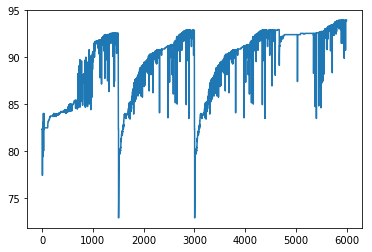

In [25]:
model = train(model,X,y,learning_rate=learningRate,epochs=trainingCycles,print_loss=True)
#model = train(model,X,y,learning_rate=0.07,epochs=4500,print_loss=True)
plt.gcf().clear()
plt.plot(losses)

In [63]:
yTest = predict(model,XTest)

In [64]:
#change the test answers data array into a 1d array that can be compared for measuring the accuracy
answersArray = []
for index, row in dfTest[['bad','average','good']].iterrows():
    #print(str(index) +" : "+str((row.values)))
    finalValue = 0;
    for idx, num in enumerate(row.values):
        correctedNum = idx*num
        finalValue += correctedNum
    answersArray.append(finalValue)
    #print(str(index) +":" +str(finalValue))

In [65]:
#The predicted answers
#yTest

In [66]:
#the real answers
answersArray = np.array(answersArray).astype(int)

In [67]:
#runn an accuracy score between the predicted numbers and real answers.
accuracy_score(answersArray, yTest)

0.1